In [1]:
# src https://github.com/cs109/2015lab11/blob/master/Lab11-Project-and-Food-Inspection-Forecasting.ipynb
# special IPython command to prepare the notebook for matplotlib
%matplotlib inline 

import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn
import statsmodels.api as sm

import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")

# special matplotlib argument for improved plots
from matplotlib import rcParams

#http://stackoverflow.com/questions/9031783/hide-all-warnings-in-ipython

In [2]:
dfErlog = pd.read_csv('data/akutliggare.txt', sep='|')

print dfErlog.shape
dfErlog.head()



(1653752, 109)


,AkutliggareID,PasID,AnkomstsattID,ProblemorsakID,BesoksorsakID,ForstaBesoksorsakID,FlyttadTillVardenhetID,FlyttadTillLokationID,VardbehovID,VardenhetID,...,AntalBesok,AntalAvlidnaInom7Dagar,AntalAvlidnaInom30Dagar,AntalSlutenvardInom6Timmar,AntalSlutenvardInom12Timmar,AntalDiagnoserOppenvard,AntalDiagnoserSlutenvard,AntalDiagnoser,Alder,SenastUppdaterad
0,1048895,9045567,3272,3795,3152,3152,NaN,-91,NaN,40,...,1,0,0,0,0,1,NaN,1,"16,726006999999999",2009-02-22 03:35:25
1,1048896,9048297,3272,3795,3140,3140,NaN,-91,NaN,39,...,1,0,0,0,0,2,NaN,2,"24,010957999999999",2009-05-13 03:53:58
2,1048897,9053522,3272,3795,3140,3140,763,NaN,NaN,431,...,0,0,0,0,0,0,NaN,0,"19,969836000000001",2009-02-10 15:36:41
3,1481210,12774621,3272,3259,3198,3198,NaN,-93,NaN,36,...,1,0,0,0,0,0,NaN,0,"18,243828000000001",2015-02-01 21:10:22
4,1048898,9055814,3272,3795,3151,3151,NaN,-91,NaN,557,...,1,0,0,0,0,1,NaN,1,"0,90134499999999995",2010-02-22 23:56:35


/Users/cankuruca/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/cankuruca/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


year  patienttype
2006  Inpatient          21
      Other             176
2007  Inpatient       22381
      Other          111054
2008  Inpatient          50
      Other             860
2009  Inpatient       45180
      Other          170185
2010  Inpatient       45903
      Other          162746
2011  Inpatient       47454
      Other          174192
2012  Inpatient       46892
      Other          179747
2013  Inpatient       44867
      Other          178728
2014  Inpatient       45234
      Other          185975
2015  Inpatient       37955
      Other          154152
Name: year, dtype: int64


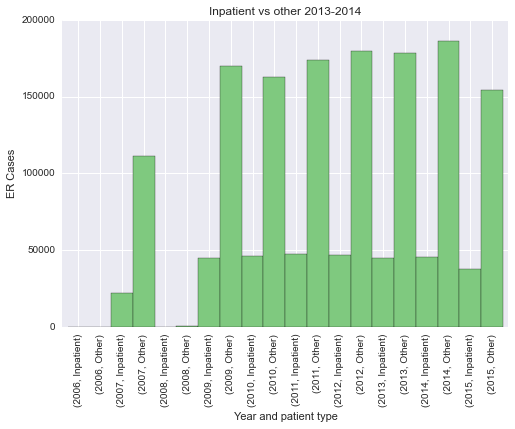

In [3]:
# Inpatient vs other 
import datetime
import math
dfInpatient = dfErlog[['ForstaSlutenvardVardenhetID','Alder','Ankomsttidpunkt']]
dfInpatient['year'] = dfInpatient.apply(lambda x: x['Ankomsttidpunkt'][0:4], axis=1)
dfInpatient['patienttype'] = dfInpatient.apply(lambda x: 'Other' if math.isnan(x['ForstaSlutenvardVardenhetID']) else 'Inpatient', axis=1)

dfChart = dfInpatient[['year','patienttype']]

import matplotlib.cm as cm
sns.set() #make the plots look pretty

ag = dfChart.groupby(['year','patienttype']).year.count() #.unstack()

print ag

#ag.columns = ag.columns.droplevel()

ag.plot(kind = 'bar', colormap = cm.Accent, width = 1)
plt.title('Inpatient vs other 2013-2014')
plt.ylabel('ER Cases')
plt.xlabel('Year and patient type')

plt.show()



In [4]:
# Missing values in case

# Complete cases 

triagecols = ['AndningsfrekvensStatusID','SaturationStatusID','KroppstemperaturStatusID','BlodtryckSystolisktOvreStatusID'
                       ,'BlodtryckDiastolisktNedreStatusID','GCSOgonoppningStatusID','GCSMotorisktStatusID'
                        ,'GCSVerbaltStatusID','StridorStatusID','PulsfrekvensRegelbundenStatusID'
                        ,'PulsfrekvensOregelbundenStatusID','MedvetandegradRettsStatusID','SaturationMedSyrgasStatusID']

#triagecols.SaturationStatusID 






In [5]:
#dfTriage.head()
#dfTriage.describe

#dfTriage.count()
dfTriage = dfErlog[triagecols]
dfTriage['SaturationStatusID'] = dfTriage['SaturationStatusID']-5
dfTriage['KroppstemperaturStatusID'] = dfTriage['KroppstemperaturStatusID']-9
dfTriage['BlodtryckSystolisktOvreStatusID'] = dfTriage['BlodtryckSystolisktOvreStatusID']-14
dfTriage['BlodtryckDiastolisktNedreStatusID'] = dfTriage['BlodtryckDiastolisktNedreStatusID']-19
dfTriage['GCSOgonoppningStatusID'] = dfTriage['GCSOgonoppningStatusID']-24
dfTriage['GCSMotorisktStatusID'] = dfTriage['GCSMotorisktStatusID']-28
dfTriage['GCSVerbaltStatusID'] = dfTriage['GCSVerbaltStatusID']-34
dfTriage['StridorStatusID'] = dfTriage['StridorStatusID']-39
dfTriage['PulsfrekvensRegelbundenStatusID'] = dfTriage['PulsfrekvensRegelbundenStatusID']-41
dfTriage['PulsfrekvensOregelbundenStatusID'] = dfTriage['PulsfrekvensOregelbundenStatusID']-47
dfTriage['MedvetandegradRettsStatusID'] = dfTriage['MedvetandegradRettsStatusID']-53
dfTriage['SaturationMedSyrgasStatusID'] = dfTriage['SaturationMedSyrgasStatusID']-57


for col in triagecols:
    print col
    print dfTriage[col].describe()
    print pd.Series(dfTriage[col].ravel()).unique()
    print '--------------'




#print dfSort
#dfTriage.count(axis=1)

/Users/cankuruca/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/cankuruca/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/cankuruca/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.o

AndningsfrekvensStatusID
count    521614.000000
mean          2.665553
std           1.016129
min           1.000000
25%           2.000000
50%           2.000000
75%           3.000000
max           5.000000
Name: AndningsfrekvensStatusID, dtype: float64
[ nan   2.   3.   5.   4.   1.]
--------------
SaturationStatusID
count    628723.000000
mean          3.901532
std           0.342198
min           1.000000
25%           4.000000
50%           4.000000
75%           4.000000
max           4.000000
Name: SaturationStatusID, dtype: float64
[ nan   4.   2.   3.   1.]
--------------
KroppstemperaturStatusID
count    611050.000000
mean          3.266386
std           0.607891
min           1.000000
25%           3.000000
50%           3.000000
75%           3.000000
max           5.000000
Name: KroppstemperaturStatusID, dtype: float64
[ nan   3.   5.   4.   2.   1.]
--------------
BlodtryckSystolisktOvreStatusID
count    464553.000000
mean          3.503155
std           0.678061
min    

In [6]:
dfErlog.columns[0:6]

Index([u'AkutliggareID', u'PasID', u'AnkomstsattID', u'ProblemorsakID',
       u'BesoksorsakID', u'ForstaBesoksorsakID'],
      dtype='object')

109


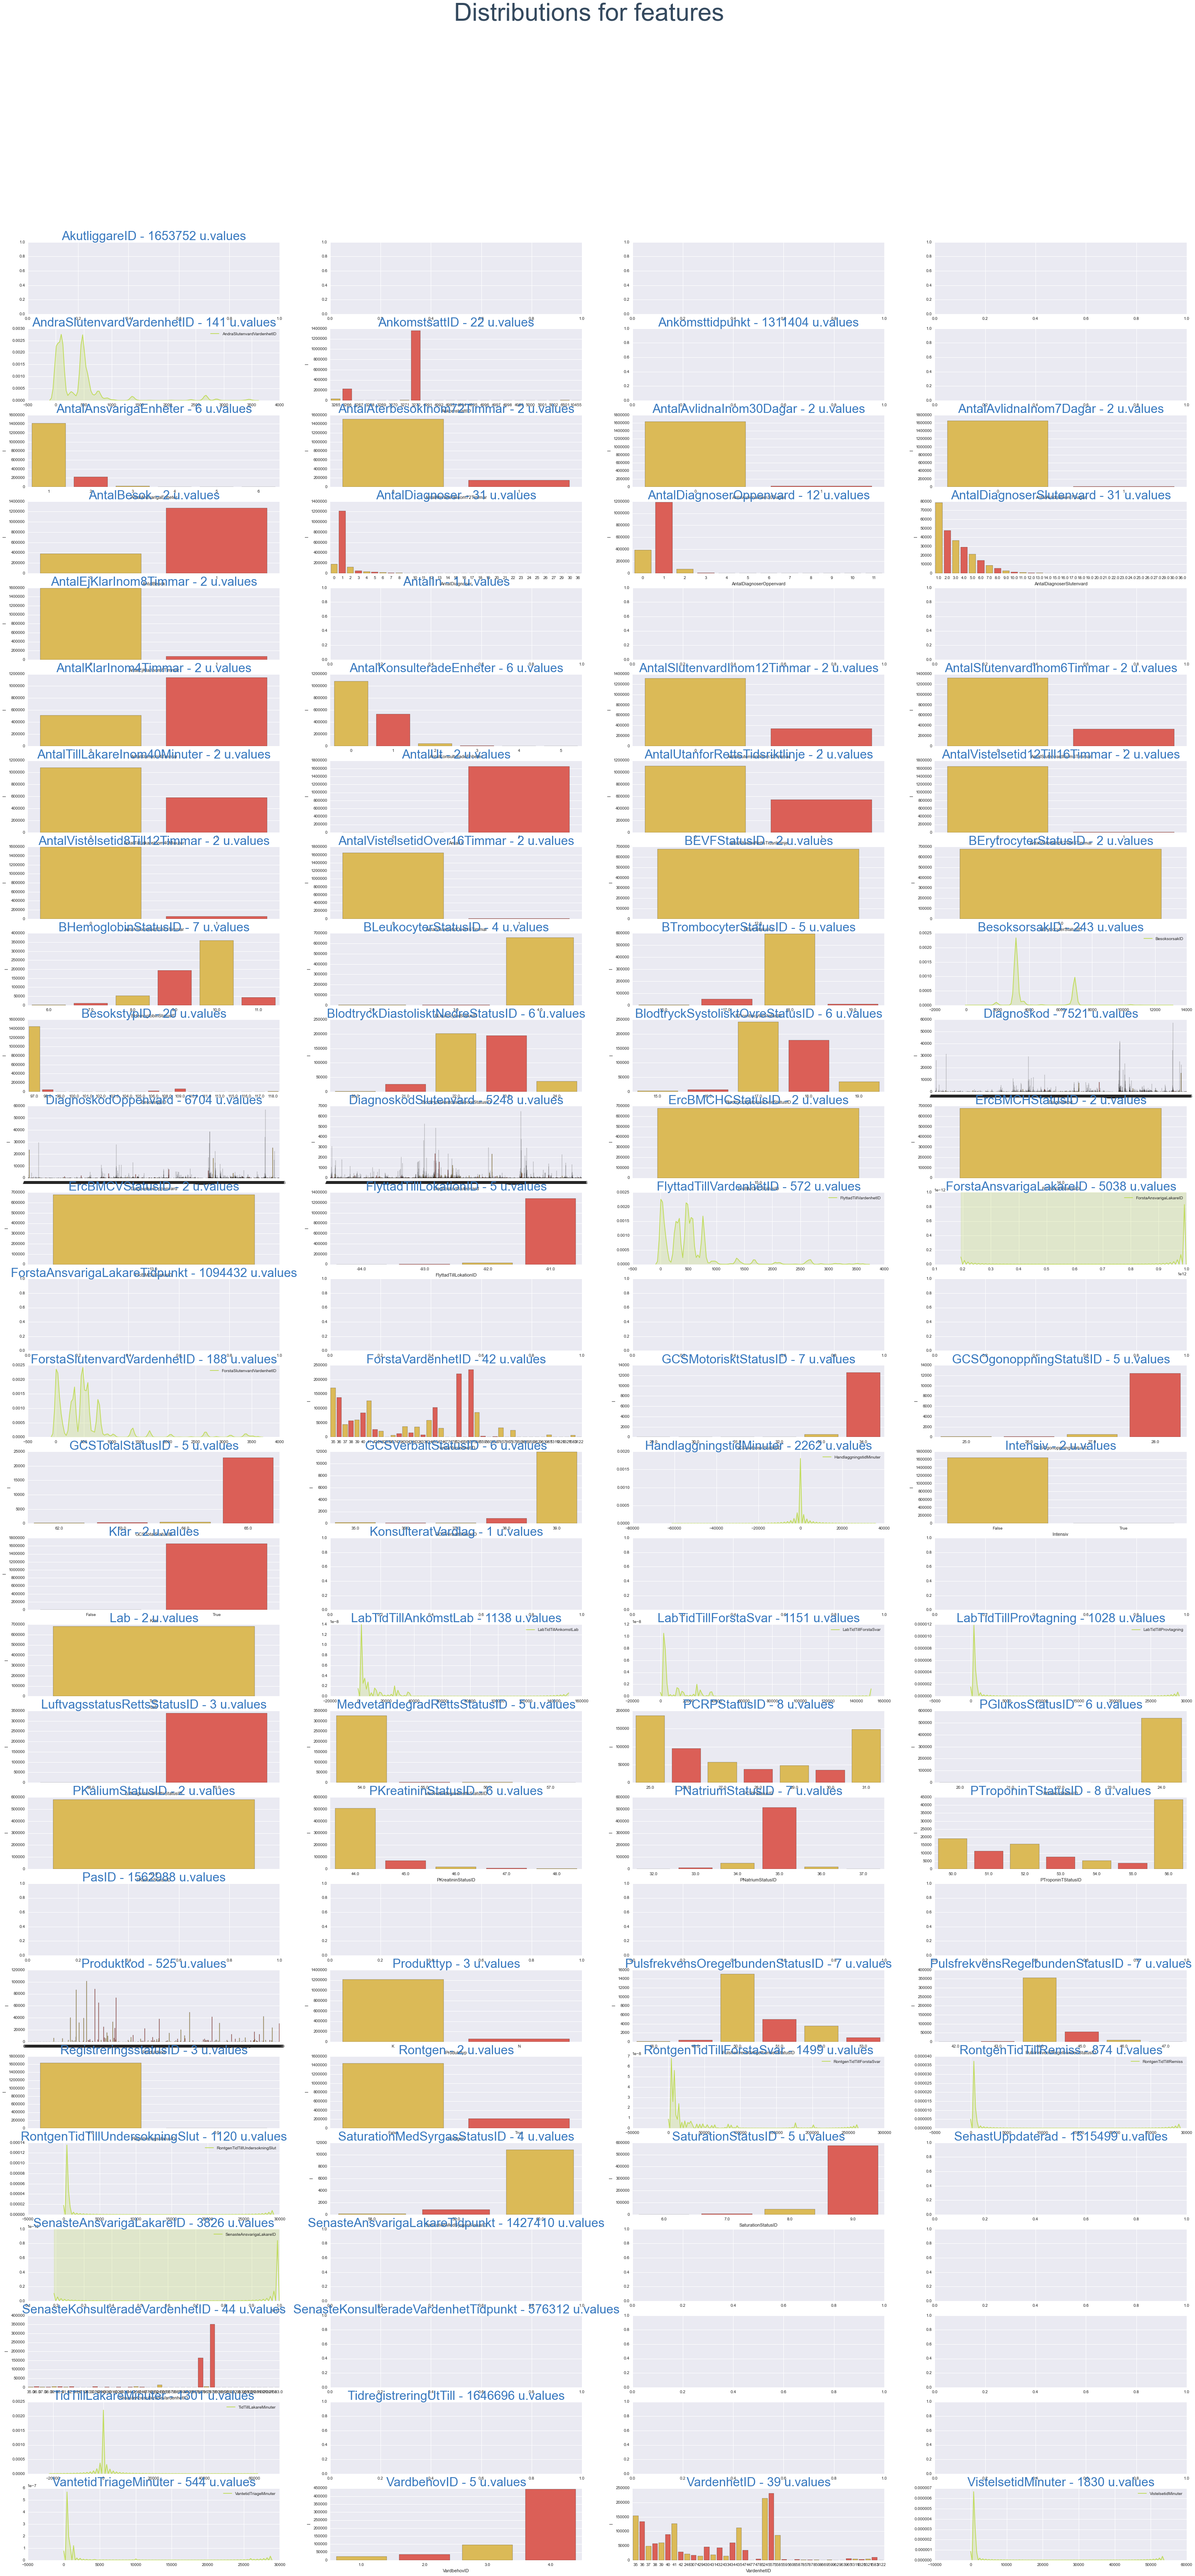

In [14]:
#feature value distribution

colors = sns.color_palette("hls", 26)
#dfErlog.drop('l', 1) 
ccols_sorted = list(dfErlog.columns[0:len(dfErlog.columns)-1])
#Always nice to sort the columns alphabetically
ccols_sorted.sort()
dfErlog["l"]=1
#3 columns per row is visually more pleasant according to my previous tests
columns_per_row = 4
fig_cont , ax_cont = plt.subplots(len(ccols_sorted)/columns_per_row,columns_per_row,figsize=(50,100))
fig_cont.suptitle('Distributions for features',fontsize=60,color="#34495e")
print len(ccols_sorted)
for i in xrange(len(ccols_sorted)/columns_per_row):
        for j in xrange(columns_per_row):
                #print i,j
                featureNo = i * columns_per_row + j
                if len(ccols_sorted)>featureNo:
                    
                    featurename = ccols_sorted[featureNo]
                    
                    if featurename == 'l':
                        break
                    featuretype =  dfErlog[featurename].dtype
                    isnum = (featuretype == np.float64 or featuretype == np.int64)
                    uniqueitems =  len(pd.unique(dfErlog[featurename].ravel()))
                    #print (featurename,uniqueitems)
                    dfStats = dfErlog.groupby([featurename],as_index=False).agg({'l' : sum})
                    curr_axis = ax_cont[i,j]
                    curr_axis.set_title(featurename + " - " + str(uniqueitems) + " u.values", fontsize=30,color=sns.xkcd_rgb["windows blue"])
                    if uniqueitems>1000000 or uniqueitems==1 or featurename.find('Tidpunkt')<>-1:
                        break
                    if isnum == True and uniqueitems>50:
                        #print 'kde'
                        sns.kdeplot(dfErlog[featurename],shade=True,c=colors[5], 
                                label=featurename,ax=curr_axis)
                    else:
                        #print 'categorical'
                        sns.barplot(x=featurename,y='l', 
                                    ci=None, data=dfStats, palette={colors[0],colors[3]
                                        },ax=curr_axis,estimator=sum)